In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot(image):
    if len(image.shape)==2:
        plt.imshow(image,cmap='gray')
        plt.show()
    else:
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()

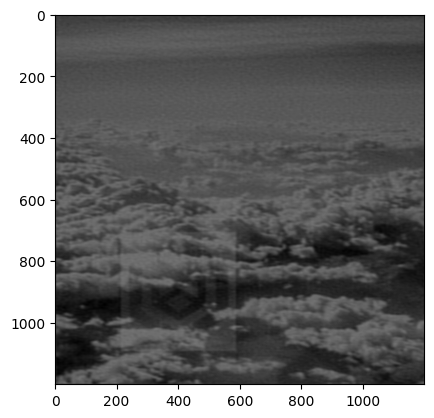

In [2]:
image = cv2.imread("Watermarked_Image1.tiff")
import numpy as np
import cv2

# Load the grayscale version of the image
gray = cv2.cvtColor(cv2.imread("Watermarked_Image1.tiff"), cv2.COLOR_BGR2GRAY)

# Apply Fourier Transform
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
# Create a magnitude spectrum
magnitude_spectrum = (np.abs(fshift))
phase_spectrum = np.angle(fshift)
# plot(magnitude_spectrum)
# plot(phase_spectrum)


# Threshold the spectrum to emphasize the logo
spectrum_mask = magnitude_spectrum > np.percentile(magnitude_spectrum, 99)

# Inverse FFT to isolate the high-frequency components
fshift[spectrum_mask ==0] = 255
inverse_fft = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift)))

# Normalize the result for visualization
normalized_result = cv2.normalize(inverse_fft, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plot(normalized_result)


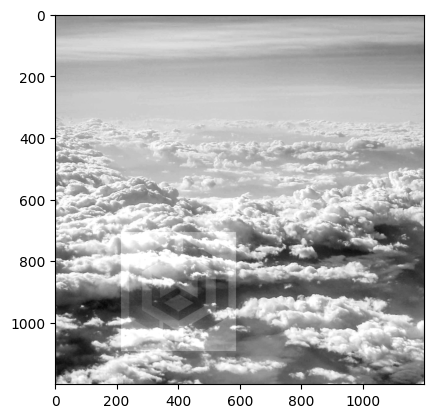

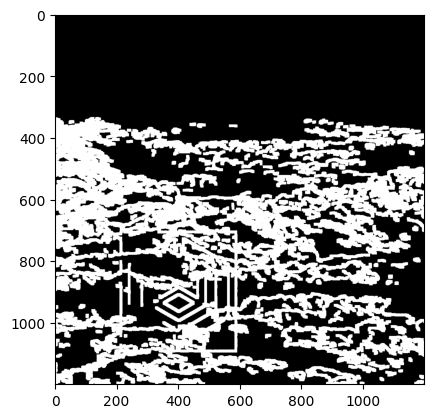

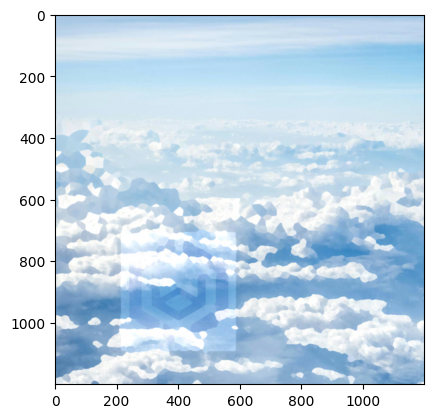

In [3]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("Watermarked_Image1.tiff")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plot(gray)
# Detect edges to find transparent watermark boundaries
edges = cv2.Canny(gray, threshold1=50, threshold2=100)

# Dilate the edges to make a clear mask
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

# Create a mask by thresholding
_, mask = cv2.threshold(dilated_edges, 1, 150, cv2.THRESH_BINARY)

plot(mask)
# Inpaint the image to remove watermark
inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
plot(inpainted_image)
# Save and display the result



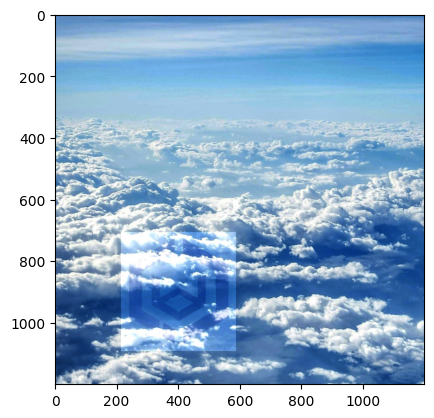

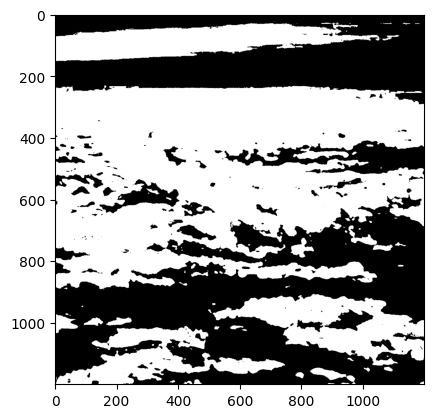

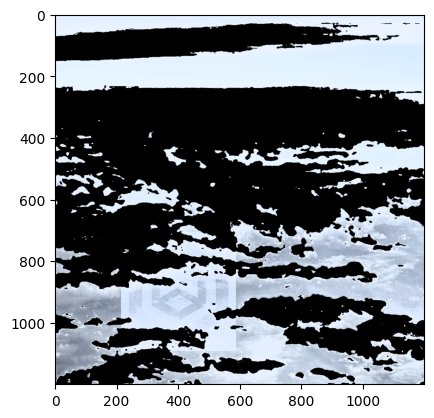

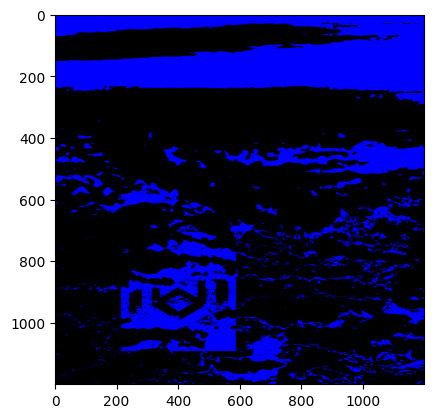

In [135]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('Watermarked_Image1.tiff')
gamma = 0.4  # Increase this value to darken the image further

# Build a lookup table for gamma correction
lookup_table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in range(256)]).astype("uint8")

# Apply the gamma correction
image = cv2.LUT(image, lookup_table)
plot(image)

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV channels
h, s, v = cv2.split(hsv_image)

# Define a mask for white pixels
# White pixels have high Value and low Saturation
white_mask = (s <100)  
plot(white_mask)
# Increas   e intensity for non-white pixels
factor = 0.2 # Adjust intensity increase factor
factor2=1.5
s[white_mask]=255
v[white_mask]=0
s[~white_mask] = np.clip(s[~white_mask] * factor, 0, 255).astype(np.uint8)
v[~white_mask] = np.clip(v[~white_mask] * factor2, 0, 255).astype(np.uint8)

# Merge the adjusted HSV channels
adjusted_hsv = cv2.merge([h, s, v])

# Convert back to BGR
adjusted_image = cv2.cvtColor(adjusted_hsv, cv2.COLOR_HSV2BGR)

plot(adjusted_image)

_, binary = cv2.threshold(adjusted_image, 250, 255, cv2.THRESH_BINARY)

plot(binary)

# Save and display the result
